# Phase 1 Project: Movie Analysis

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Importing relevant packages and loading in the data

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv(r'C:\Users\User1\Documents\Github copy\Phase_1\dsc-phase-1-project-v2-3-master (1)\dsc-phase-1-project-v2-3-master\zippedData\imdb.title.basics.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [108]:
ratings = pd.read_csv(r'C:\Users\User1\Documents\Github copy\Phase_1\dsc-phase-1-project-v2-3-master (1)\dsc-phase-1-project-v2-3-master\zippedData\imdb.title.ratings.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [109]:
movie_gross = pd.read_csv(r'C:\Users\User1\Documents\Github copy\Phase_1\dsc-phase-1-project-v2-3-master (1)\dsc-phase-1-project-v2-3-master\zippedData\bom.movie_gross.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Merging all the dataframes**

In [110]:
df_ratings = df.merge(ratings, on = "tconst", how = "inner")
df_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [111]:
all3 = df_ratings.merge(movie_gross, left_on = 'primary_title', right_on = 'title', how = 'inner')
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [112]:
#creating a column to count the genres
genres_df = pd.DataFrame(all3.groupby('genres').size()).reset_index().rename(columns = {0:'count'}).sort_values(by = 'count', ascending = False)

#now selecting the first 5 rows (5 most common genres)
genres_df2 = genres_df.head()

#merging the 2 dataframes
merged_genres = all3.merge(genres_df2, on = 'genres', how = 'inner')
merged_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,count
0,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012,317
1,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012,317
2,tt0455323,Being Flynn,Being Flynn,2012,102.0,Drama,6.4,15780,Being Flynn,Focus,540000.0,NaN,2012,317
3,tt0460890,The Only Living Boy in New York,The Only Living Boy in New York,2017,89.0,Drama,6.3,8727,The Only Living Boy in New York,RAtt.,624000.0,1900000,2017,317
4,tt0466893,Margaret,Margaret,2011,150.0,Drama,6.5,14708,Margaret,FoxS,46500.0,NaN,2011,317


In [103]:
merged_genres['genres'].value_counts(dropna = False) #making sure the counts are correct

Drama                   317
Comedy,Drama            133
Comedy,Drama,Romance    132
Drama,Romance           112
Documentary             110
Name: genres, dtype: int64

**Plotting the distribution of the 5 most common genres' foreign gross revenue**

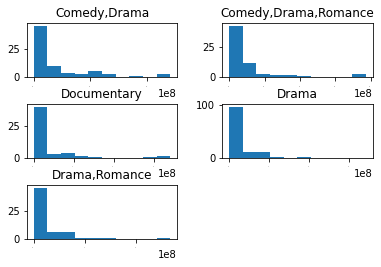

In [104]:
merged_genres['FOREIGN_GROSS'].hist(xlabelsize = 0.1, by=merged_genres['genres']);

In [105]:
all3.groupby('genres')['averagerating'].describe() #looking at the distribution of average rating for each genre

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,18.0,6.116667,1.308906,4.1,5.225,5.75,7.175,8.6
"Action,Adventure",6.0,5.866667,0.463321,5.0,5.825,5.95,6.150,6.3
"Action,Adventure,Animation",22.0,7.354545,0.573815,5.6,7.200,7.30,7.800,8.1
"Action,Adventure,Biography",4.0,7.000000,0.687992,6.5,6.575,6.75,7.175,8.0
"Action,Adventure,Comedy",32.0,6.271875,1.072000,4.1,5.475,6.20,7.025,8.1
...,...,...,...,...,...,...,...,...
"Romance,Thriller",2.0,5.850000,0.494975,5.5,5.675,5.85,6.025,6.2
Sci-Fi,2.0,5.050000,1.202082,4.2,4.625,5.05,5.475,5.9
Sport,1.0,7.900000,NaN,7.9,7.900,7.90,7.900,7.9


In [54]:
all3.groupby('genres')['foreign_gross'].describe() #looking at the distribution for foreign gross revenue
#foreign gross does not seem to be read in as numeric--need to convert

,count,unique,top,freq
genres,,,,
Action,11,11,19500000,1
"Action,Adventure",2,2,347000,1
"Action,Adventure,Animation",17,17,19200000,1
"Action,Adventure,Biography",4,4,68900000,1
"Action,Adventure,Comedy",25,25,286100000,1
...,...,...,...,...
"Romance,Thriller",2,2,121000,1
Sci-Fi,1,1,409300000,1
Sport,0,0,NaN,NaN


In [55]:
all3.dtypes #checking the data types for each column

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [113]:
all3['new_foreign_gross'] = all3['foreign_gross'].str.replace(",", "") #removing the commas
all3['FOREIGN_GROSS'] = all3['new_foreign_gross'].astype(float) #converting to a float
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_foreign_gross,FOREIGN_GROSS
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,129900000,129900000.0


In [59]:
all3.groupby('genres')['FOREIGN_GROSS'].describe() #working correctly now

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,11.0,5.055455e+07,8.484839e+07,2500000.0,4449999.5,19500000.0,50650000.0,290500000.0
"Action,Adventure",2.0,2.023500e+06,2.370929e+06,347000.0,1185250.0,2023500.0,2861750.0,3700000.0
"Action,Adventure,Animation",17.0,2.511471e+08,2.028272e+08,1700000.0,53800000.0,277300000.0,405700000.0,634200000.0
"Action,Adventure,Biography",4.0,1.470250e+08,1.427101e+08,28500000.0,58800000.0,105150000.0,193375000.0,349300000.0
"Action,Adventure,Comedy",25.0,2.597680e+08,1.715604e+08,15000000.0,151800000.0,255000000.0,406000000.0,557600000.0
...,...,...,...,...,...,...,...,...
"Romance,Thriller",2.0,6.560500e+06,9.106828e+06,121000.0,3340750.0,6560500.0,9780250.0,13000000.0
Sci-Fi,1.0,4.093000e+08,NaN,409300000.0,409300000.0,409300000.0,409300000.0,409300000.0
Sport,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
sorted_all3 = all3.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = False)
sorted_all3.head()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
"Adventure,Drama,Sport",1.0,8.757000e+08,NaN,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
"Action,Comedy,Mystery",1.0,5.421000e+08,NaN,542100000.0,542100000.0,542100000.0,542100000.0,542100000.0
"Adventure,Fantasy",3.0,5.111333e+08,3.279064e+08,132500000.0,416250000.0,700000000.0,700450000.0,700900000.0
"Fantasy,Romance",2.0,4.585000e+08,5.900099e+08,41300000.0,249900000.0,458500000.0,667100000.0,875700000.0
"Adventure,Drama,Sci-Fi",2.0,4.455500e+08,6.201326e+07,401700000.0,423625000.0,445550000.0,467475000.0,489400000.0
